# Data Preprocessing
This notebook processes the Wine Quality dataset from UCI Machine Learning Repository.

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [139]:
red_wine = pd.read_csv("../data/raw/winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
red_wine.shape

(1599, 12)

In [141]:
white_wine = pd.read_csv("../data/raw/winequality-white.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [142]:
white_wine.shape

(4898, 12)

### Merge datasets
Since the files for red and white wine have the same features, we can merge the files together and use a binary indicator variable to indicate the wine colour.

In [143]:
red_wine["is_red_wine"] = 1
white_wine["is_red_wine"] = 0

In [144]:
wine = pd.concat([red_wine, white_wine], ignore_index=True)
wine.insert(0, "is_red_wine", wine.pop("is_red_wine"))
wine

,is_red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Inspect data

We check the type of variables for each column

In [145]:
wine.info()

<class 'pandas.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_red_wine           6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


The information above shows that there are no null values in this dataset, since the number of non-null values matches with the number of rows. We can verify this by running `.isnull().sum()`

In [146]:
wine.isnull().sum()

is_red_wine             0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We now check for duplicates and remove them if they exist.

In [147]:
int(wine.duplicated().sum())

1177

In [148]:
wine.drop_duplicates(inplace=True)
wine = wine.reset_index(drop=True)

In [149]:
wine.shape

(5320, 13)

We now check for the distribution for the wine quality.

In [150]:
pd.crosstab(wine["is_red_wine"], wine["quality"])

quality,3,4,5,6,7,8,9
is_red_wine,,,,,,,
0,20,153,1175,1788,689,131,5
1,10,53,577,535,167,17,0


Most wine have a quality between 5 and 7. Although the original publisher of the dataset defines wine with quality of 5-7 to be normal, in this project we set the boundary at 5, defining wines with a score of 5 or lower as 'poor' and wines with a score of 6 or higher as 'good'

In [151]:
len(wine[wine["quality"] <= 5])

1988

In [152]:
len(wine[wine["quality"] > 5])

3332

While there is an imbalance between the two categories, it is relatively mild and therefore doesn't need resampling.

### Feature selection

In [153]:
correlation_matrix = wine.corr()

In [154]:
correlation_matrix

,is_red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
is_red_wine,1.000000,0.486253,0.645335,-0.183759,-0.328695,0.499517,-0.465326,-0.694229,0.429377,0.310919,0.490364,-0.057756,-0.114809
fixed acidity,0.486253,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.645335,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,-0.183759,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.328695,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.499517,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.465326,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.694229,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.429377,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,0.310919,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733


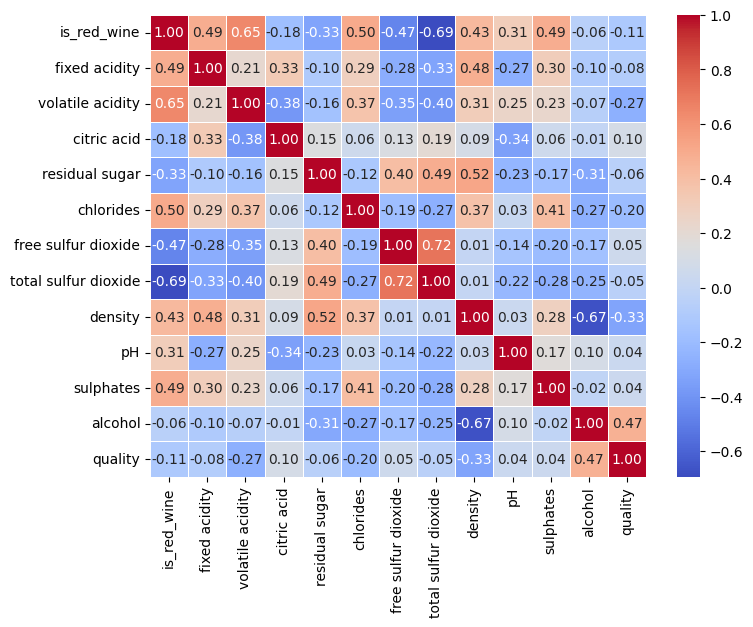

In [155]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

The features that have the highest correlation with `quality` are `alcohol`(0.47), `density`(-0.33), `volatile acidity`(-0.27), and `chlorides`(-0.20). These features, along with `is_red_wine`, will be selected.

### Data transformation

We will use `quality_label` to represent the target variable in this problem. `quality_label` = 0 if `quality` <= 5, and 1 otherwise.

In [156]:
wine["quality_label"] = wine["quality"].apply(lambda x: 1 if x <= 5 else 0)
wine_cleaned = wine[["is_red_wine", "alcohol", "density", "volatile acidity", "chlorides", "quality_label"]]
wine_cleaned

,is_red_wine,alcohol,density,volatile acidity,chlorides,quality_label
0,1,9.4,0.99780,0.70,0.076,1
1,1,9.8,0.99680,0.88,0.098,1
2,1,9.8,0.99700,0.76,0.092,1
3,1,9.8,0.99800,0.28,0.075,0
4,1,9.4,0.99780,0.66,0.075,1
...,...,...,...,...,...,...
5315,0,11.2,0.99114,0.21,0.039,0
5316,0,9.6,0.99490,0.32,0.047,1
5317,0,9.4,0.99254,0.24,0.041,0
5318,0,12.8,0.98869,0.29,0.022,0


In [157]:
wine_cleaned.to_csv("../data/cleaned/winequality_cleaned.csv", index=False)

We will split the cleaned dataset into training and testing data using a 80/20 train-test split.

In [158]:
from sklearn.model_selection import train_test_split

X = wine_cleaned.drop(columns="quality_label")
y = wine_cleaned["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
wine_train = pd.concat([X_train, y_train], axis=1)
wine_train.to_csv("../data/cleaned/winequality_train.csv", index=False)

In [160]:
wine_test = pd.concat([X_test, y_test], axis=1)
wine_test.to_csv("../data/cleaned/winequality_test.csv", index=False)